<a href="https://colab.research.google.com/github/Walmartjr008/Prediction-for-Warehouse-stocking/blob/main/Copy_of_ARIMA_with_Walmart_Dataframe_taking_Technology_as_Category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_excel('/content/walmart.xls')
Technology = df.loc[df['Category'] == 'Technology']

In [ ]:
Technology['Order Date'].min(),Technology['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [ ]:

Technology.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [ ]:
Technology = Technology.groupby('Order Date')['Sales'].sum().reset_index()

In [ ]:
Technology = Technology.set_index('Order Date')
Technology.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

In [ ]:
y =Technology['Sales'].resample('MS').mean()
y['2017':]

Order Date
2017-01-01    1195.218071
2017-02-01     430.501714
2017-03-01    1392.859250
2017-04-01     825.559133
2017-05-01     678.329400
2017-06-01     853.055000
2017-07-01    1054.996636
2017-08-01     978.842333
2017-09-01    1077.704120
2017-10-01    1493.439227
2017-11-01    1996.750920
2017-12-01     955.865652
Freq: MS, Name: Sales, dtype: float64

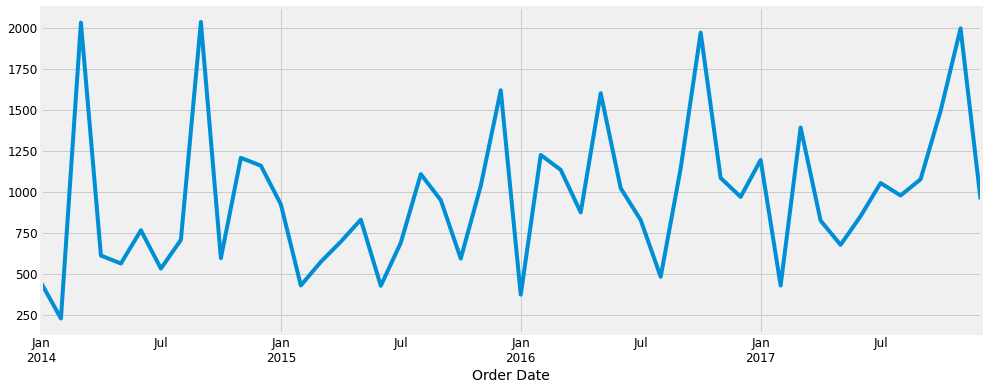

In [ ]:
y.plot(figsize=(15, 6))
plt.show()

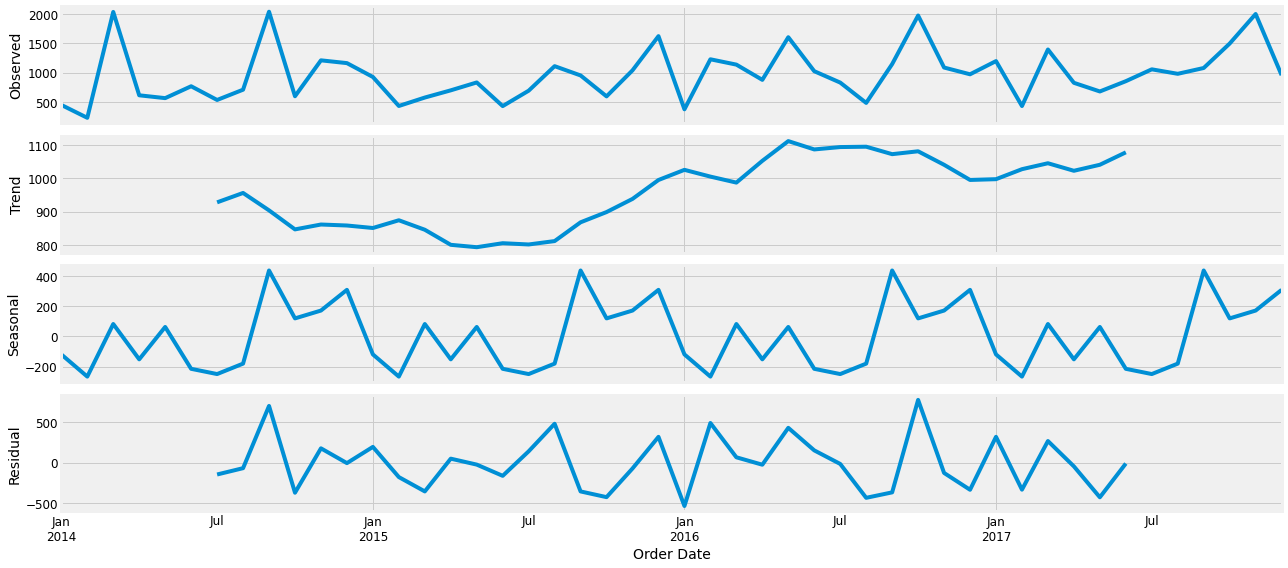

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))      
        except:    
          continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:791.4891765009954
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1584.5361008249356
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:549.0156237882128
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:564.1031529698099
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:542.9210079120229
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:372.6612068172691


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:750.8969484750893
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3197.483956287273
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:535.0489454747216
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:566.08279040281
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:526.5322596458968
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:373.87600658686597
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:729.3478530237927
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1322.047486065406


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:562.7585881217353
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:543.3082156228088
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1364.5006276954323


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:377.0354481434961
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:675.9599897483566
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2943.4770789924423
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:517.5329284811435
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:526.5542322434154
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2573.3325032509315
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:359.5230842754442
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:742.0250351345343
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1570.913442415612
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:550.272134077019


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:543.2786122758243
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:543.687519436304
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:359.37687065896887
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:699.8975570622567
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2775.592450438459
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:536.8995751104103
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:527.7942232823231


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:513.014937126623
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:361.31492579750005
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:717.9677328156988


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1245.9560036608182
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:555.4581770800665
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:522.5042506796289


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1214.6586646622504
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:355.1259547275576
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:677.6306925349004
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2549.263597658843
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:518.7903710454192
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:513.1256895923898
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2571.893066449254
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:343.6037335973486


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2357      0.229     -1.028      0.304      -0.685       0.214
ma.L1         -1.0000      0.275     -3.638      0.000      -1.539      -0.461
ar.S.L12      -0.6165      0.141     -4.358      0.000      -0.894      -0.339
sigma2      2.332e+05   1.18e-06   1.98e+11      0.000    2.33e+05    2.33e+05


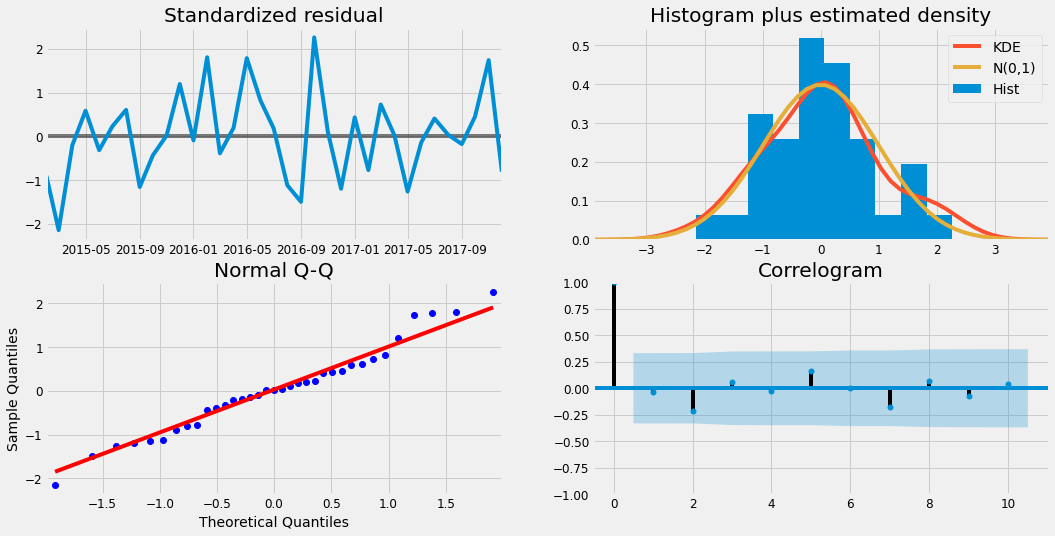

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

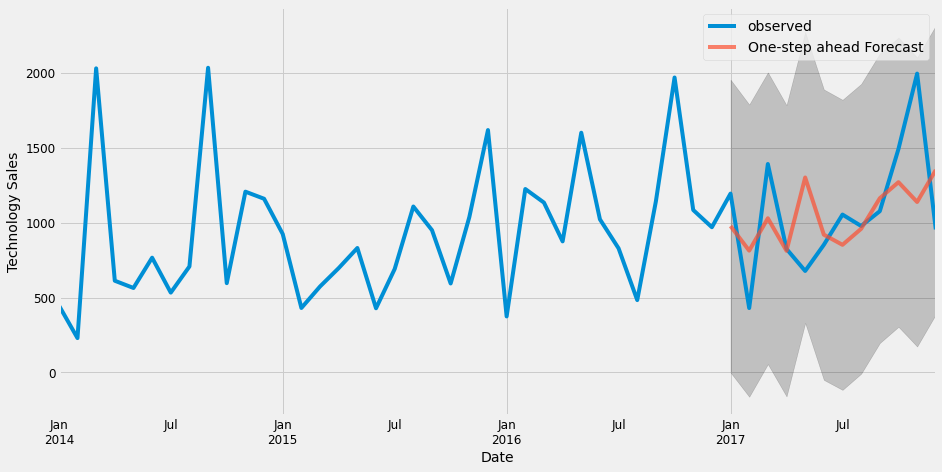

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 142623.98


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Root Mean Squared Error of our forecasts is 377.66


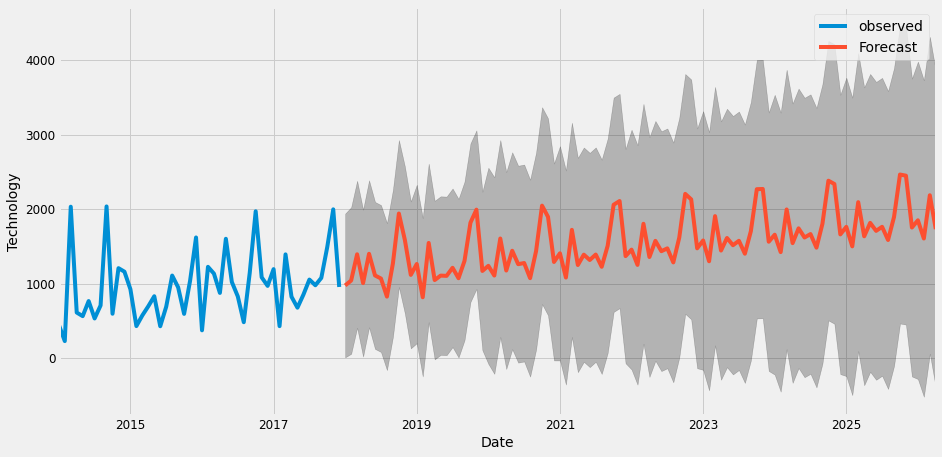

In [ ]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Technology')
plt.legend()
plt.show()

In [ ]:
Technology = df.loc[df['Category'] == 'Technology']
office = df.loc[df['Category'] == 'Office Supplies']
Technology.shape, office.shape

((1847, 21), (6026, 21))

In [ ]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
Technology.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
Technology = Technology.sort_values('Order Date')
office = office.sort_values('Order Date')
Technology = Technology.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
Technology = Technology.set_index('Order Date')
office = office.set_index('Order Date')
y_Technology =Technology['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
Technology = pd.DataFrame({'Order Date':y_Technology.index, 'Sales':y_Technology.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
store = Technology.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'Technology_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Order Date,Technology_sales,office_sales
0,2014-01-01,449.041429,285.357647
1,2014-02-01,229.787143,63.042588
2,2014-03-01,2031.948375,391.176318
3,2014-04-01,613.028933,464.794750
4,2014-05-01,564.698588,324.346545


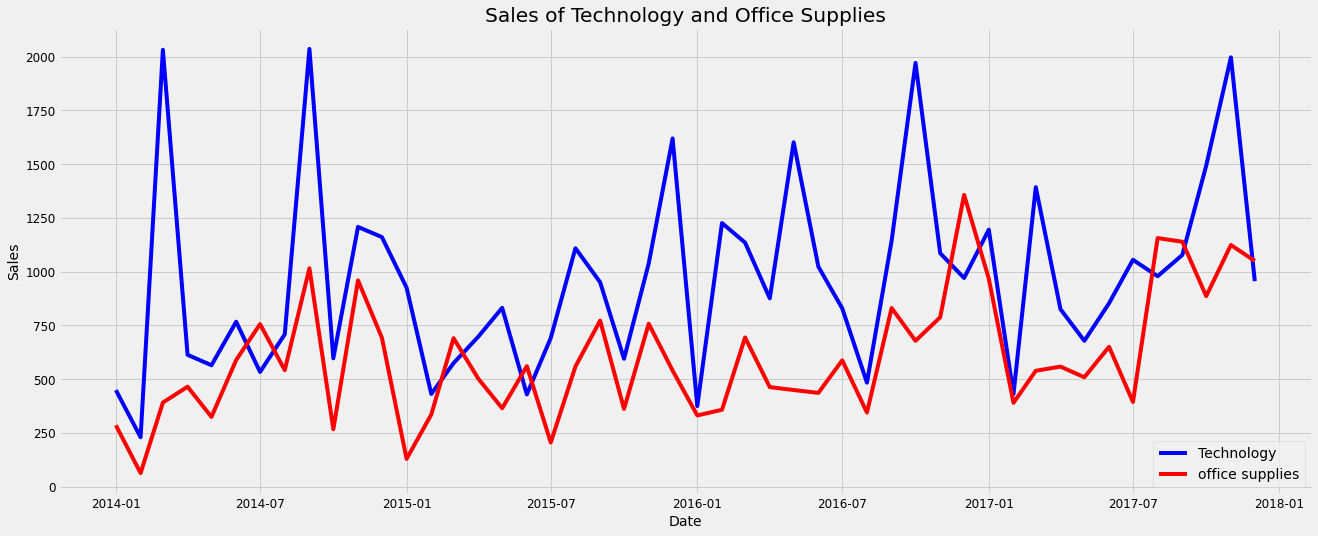

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['Technology_sales'], 'b-', label = 'Technology')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Technology and Office Supplies')
plt.legend();